In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import tensorflow as tf

In [5]:
df_pre = pd.read_csv('./dataset/wine.csv', header = None)
df = df_pre.sample(frac = 1)

In [6]:
print(df.head(5))

       0     1     2      3      4      5      6        7     8     9     10  \
1622  7.6  0.67  0.14   1.50  0.074   25.0  168.0  0.99370  3.05  0.51   9.3   
4941  6.5  0.26  0.32   6.65  0.059   34.0  104.0  0.99254  3.18  0.42  11.1   
3604  7.0  0.28  0.33  14.60  0.043   47.0  168.0  0.99940  3.34  0.67   8.8   
5338  7.0  0.15  0.28  14.70  0.051   29.0  149.0  0.99792  2.96  0.39   9.0   
5468  6.2  0.22  0.30  12.40  0.054  108.0  152.0  0.99728  3.10  0.47   9.5   

      11  12  
1622   5   0  
4941   5   0  
3604   6   0  
5338   7   0  
5468   6   0  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1622 to 212
Data columns (total 13 columns):
0     6497 non-null float64
1     6497 non-null float64
2     6497 non-null float64
3     6497 non-null float64
4     6497 non-null float64
5     6497 non-null float64
6     6497 non-null float64
7     6497 non-null float64
8     6497 non-null float64
9     6497 non-null float64
10    6497 non-null float64
11    6497 non-null int64
12    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [9]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [10]:
# 와인 종류 예측 데이터 확인과 실행
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [11]:
# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [12]:
# 데이터 입력
df_pre = pd.read_csv('./dataset/wine.csv', header = None)
df = df_pre.sample(frac = 1)
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [13]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [14]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# 모델 실행
model.fit(X, Y, epochs = 200, batch_size = 200)

Epoch 1/200
6497/6497 [==============================] - 0s 71us/step - loss: 3.5725 - accuracy: 0.2461
Epoch 2/200
6497/6497 [==============================] - 0s 9us/step - loss: 0.4310 - accuracy: 0.8122
Epoch 3/200
6497/6497 [==============================] - 0s 12us/step - loss: 0.2413 - accuracy: 0.9258
Epoch 4/200
6497/6497 [==============================] - 0s 11us/step - loss: 0.2140 - accuracy: 0.9301
Epoch 5/200
6497/6497 [==============================] - 0s 10us/step - loss: 0.2039 - accuracy: 0.9306
Epoch 6/200
6497/6497 [==============================] - 0s 9us/step - loss: 0.1986 - accuracy: 0.9315
Epoch 7/200
6497/6497 [==============================] - 0s 9us/step - loss: 0.1951 - accuracy: 0.9321
Epoch 8/200
6497/6497 [==============================] - 0s 9us/step - loss: 0.1895 - accuracy: 0.9326
Epoch 9/200
6497/6497 [==============================] - 0s 8us/step - loss: 0.1870 - accuracy: 0.9329
Epoch 10/200
6497/6497 [==============================] - 0s 8us/step

In [16]:
print('\n model accuracy : %.4f' % (model.evaluate(X, Y)[1]))

6497/6497 [==============================] - 0s 26us/step

 model accuracy : 0.9858


In [18]:
# epoch마다 accuracy를 기록하며 model 저장하기
import os

MODEL_DIR = './model/' # 모델 저장 폴더
if not os.path.exists(MODEL_DIR): # 위 폴더가 존재하지 않으면
    os.mkdir(MODEL_DIR) # 이 이름의 폴더를 만들어줌

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [19]:
from keras.callbacks import ModelCheckpoint

In [20]:
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1)

In [21]:
model.fit(X, Y, validation_split = 0.2, epochs = 200, batch_size = 200, verbose = 0, callbacks = [checkpointer])


Epoch 00001: saving model to ./model/01-0.0491.hdf5

Epoch 00002: saving model to ./model/02-0.0542.hdf5

Epoch 00003: saving model to ./model/03-0.0502.hdf5

Epoch 00004: saving model to ./model/04-0.0523.hdf5

Epoch 00005: saving model to ./model/05-0.0467.hdf5

Epoch 00006: saving model to ./model/06-0.0466.hdf5

Epoch 00007: saving model to ./model/07-0.0510.hdf5

Epoch 00008: saving model to ./model/08-0.0464.hdf5

Epoch 00009: saving model to ./model/09-0.0468.hdf5

Epoch 00010: saving model to ./model/10-0.0550.hdf5

Epoch 00011: saving model to ./model/11-0.0473.hdf5

Epoch 00012: saving model to ./model/12-0.0494.hdf5

Epoch 00013: saving model to ./model/13-0.0476.hdf5

Epoch 00014: saving model to ./model/14-0.0464.hdf5

Epoch 00015: saving model to ./model/15-0.0484.hdf5

Epoch 00016: saving model to ./model/16-0.0550.hdf5

Epoch 00017: saving model to ./model/17-0.0512.hdf5

Epoch 00018: saving model to ./model/18-0.0464.hdf5

Epoch 00019: saving model to ./model/19-0.046

In [22]:
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

In [23]:
# 모델 업데이트
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd
import tensorflow as tf


In [24]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [25]:
df_pre = pd.read_csv('./dataset/wine.csv', header = None)
df = df_pre.sample(frac = 1)

In [26]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [27]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [28]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [29]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [30]:
# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

In [31]:
# 모델 실행 및 저장
model.fit(X, Y, validation_split = 0.2, epochs = 200, batch_size = 200, verbose = 0, callbacks = [checkpointer])


Epoch 00001: val_loss improved from inf to 0.35566, saving model to ./model/01-0.3557.hdf5

Epoch 00002: val_loss improved from 0.35566 to 0.31362, saving model to ./model/02-0.3136.hdf5

Epoch 00003: val_loss improved from 0.31362 to 0.28975, saving model to ./model/03-0.2898.hdf5

Epoch 00004: val_loss improved from 0.28975 to 0.27080, saving model to ./model/04-0.2708.hdf5

Epoch 00005: val_loss improved from 0.27080 to 0.24783, saving model to ./model/05-0.2478.hdf5

Epoch 00006: val_loss improved from 0.24783 to 0.22920, saving model to ./model/06-0.2292.hdf5

Epoch 00007: val_loss improved from 0.22920 to 0.21567, saving model to ./model/07-0.2157.hdf5

Epoch 00008: val_loss improved from 0.21567 to 0.20427, saving model to ./model/08-0.2043.hdf5

Epoch 00009: val_loss improved from 0.20427 to 0.19573, saving model to ./model/09-0.1957.hdf5

Epoch 00010: val_loss improved from 0.19573 to 0.18878, saving model to ./model/10-0.1888.hdf5

Epoch 00011: val_loss improved from 0.18878

In [32]:
df = df_pre.sample(frac = 0.15)

history = model.fit(X, Y, validation_split = 0.33, epochs = 3500, batch_size = 500)

Train on 4352 samples, validate on 2145 samples
Epoch 1/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0535 - accuracy: 0.9851 - val_loss: 0.0524 - val_accuracy: 0.9837
Epoch 2/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0498 - accuracy: 0.9871 - val_loss: 0.0514 - val_accuracy: 0.9860
Epoch 3/3500
4352/4352 [==============================] - 0s 7us/step - loss: 0.0501 - accuracy: 0.9871 - val_loss: 0.0512 - val_accuracy: 0.9865
Epoch 4/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0497 - accuracy: 0.9867 - val_loss: 0.0513 - val_accuracy: 0.9865
Epoch 5/3500
4352/4352 [==============================] - 0s 8us/step - loss: 0.0499 - accuracy: 0.9862 - val_loss: 0.0514 - val_accuracy: 0.9860
Epoch 6/3500
4352/4352 [==============================] - 0s 7us/step - loss: 0.0502 - accuracy: 0.9860 - val_loss: 0.0511 - val_accuracy: 0.9846
Epoch 7/3500
4352/4352 [==============================] - 0s 6us/step - loss

In [36]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

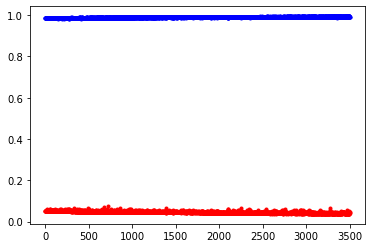

In [38]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c = 'red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize = 3)
plt.show()

In [40]:
#학습 자동중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

# 모델 실행
model.fit(X, Y, validation_split = 0.2, epochs = 2000, batch_size = 500, callbacks = [early_stopping_callback])

Train on 5197 samples, validate on 1300 samples
Epoch 1/2000
5197/5197 [==============================] - 0s 5us/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0435 - val_accuracy: 0.9923
Epoch 2/2000
5197/5197 [==============================] - 0s 6us/step - loss: 0.0248 - accuracy: 0.9929 - val_loss: 0.0480 - val_accuracy: 0.9915
Epoch 3/2000
5197/5197 [==============================] - 0s 5us/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.0428 - val_accuracy: 0.9915
Epoch 4/2000
5197/5197 [==============================] - 0s 5us/step - loss: 0.0247 - accuracy: 0.9933 - val_loss: 0.0471 - val_accuracy: 0.9915
Epoch 5/2000
5197/5197 [==============================] - 0s 5us/step - loss: 0.0239 - accuracy: 0.9933 - val_loss: 0.0454 - val_accuracy: 0.9931
Epoch 6/2000
5197/5197 [==============================] - 0s 5us/step - loss: 0.0275 - accuracy: 0.9917 - val_loss: 0.0454 - val_accuracy: 0.9908
Epoch 7/2000
5197/5197 [==============================] - 0s 5us/step - loss

In [41]:
print('\n Accuracy : %.4f' % (model.evaluate(X, Y)[1]))

6497/6497 [==============================] - 0s 22us/step

 Accuracy : 0.9914


In [42]:
# 전체 코드
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pandas as pd
import os
import tensorflow as tf

In [43]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [45]:
df_pre = pd.read_csv('./dataset/wine.csv', header = None)
df = df_pre.sample(frac = 0.15)
dataset = df.values 
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [46]:
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [47]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [48]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [49]:
# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

In [ ]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 100)

model.fit(X, Y, validation_split = 0.2, epochs = 3500, batch_size = 500, verbose = 0, callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.77907, saving model to ./model/01-0.7791.hdf5

Epoch 00002: val_loss improved from 0.77907 to 0.66174, saving model to ./model/02-0.6617.hdf5

Epoch 00003: val_loss improved from 0.66174 to 0.56307, saving model to ./model/03-0.5631.hdf5

Epoch 00004: val_loss improved from 0.56307 to 0.48140, saving model to ./model/04-0.4814.hdf5

Epoch 00005: val_loss improved from 0.48140 to 0.41509, saving model to ./model/05-0.4151.hdf5

Epoch 00006: val_loss improved from 0.41509 to 0.36900, saving model to ./model/06-0.3690.hdf5

Epoch 00007: val_loss improved from 0.36900 to 0.35353, saving model to ./model/07-0.3535.hdf5

Epoch 00008: val_loss did not improve from 0.35353

Epoch 00009: val_loss did not improve from 0.35353

Epoch 00010: val_loss did not improve from 0.35353

Epoch 00011: val_loss did not improve from 0.35353

Epoch 00012: val_loss did not improve from 0.35353

Epoch 00013: val_loss improved from 0.35353 to 0.34109, saving model to